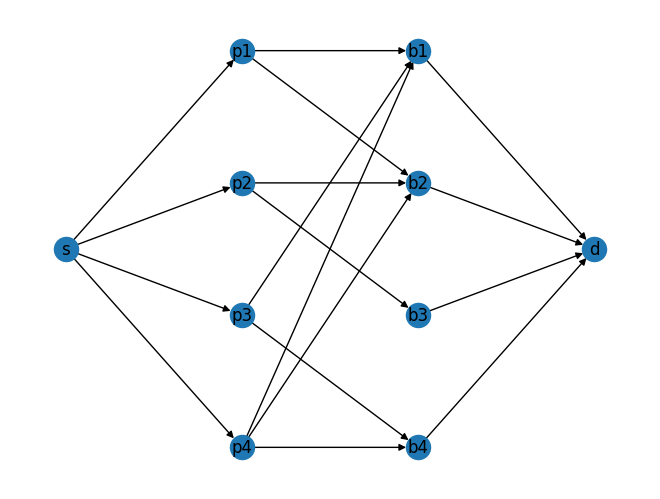

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from([(0,4),(0,5),(1,5),(1,6),(2,4),(2,7),(3,4),(3,5),(3,7)])
G.add_edges_from([(8,0),(8,1),(8,2),(8,3),(4,9),(5,9),(6,9),(7,9)])
mapping = {8: "s", 9: "d",0: "p1", 1 : "p2", 2:"p3",3:"p4",4:"b1",5:"b2",6:"b3",7:"b4"} # s:source d:destination
H = nx.relabel_nodes(G, mapping)
pos = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[1,2], "b2":[1,1], "b3":[1,0], "b4":[1,-1], "s":[-1,0.5], "d":[2,0.5]}


nx.draw(H,pos,with_labels=True)

In [3]:
G[8][0]['capacity'] = 1
G[8][1]['capacity'] = 1
G[8][2]['capacity'] = 1
G[8][3]['capacity'] = 1
G[4][9]['capacity'] = 1
G[5][9]['capacity'] = 1
G[6][9]['capacity'] = 1
G[7][9]['capacity'] = 1
G[0][4]['capacity'] = float("inf")
G[0][5]['capacity'] = float("inf")
G[1][5]['capacity'] = float("inf")
G[1][6]['capacity'] = float("inf")
G[2][4]['capacity'] = float("inf")
G[2][7]['capacity'] = float("inf")
G[3][4]['capacity'] = float("inf")
G[3][5]['capacity'] = float("inf")
G[3][7]['capacity'] = float("inf")

In [4]:
tmp = nx.algorithms.flow.maximum_flow(G,8,9)
flowSOL = tmp[1]
throughput = tmp[0]

In [5]:
tempTuple = []
for key in flowSOL:
  for el in flowSOL[key]:
    if(flowSOL[key][el] != 0):
      tempTuple.append((key,el))


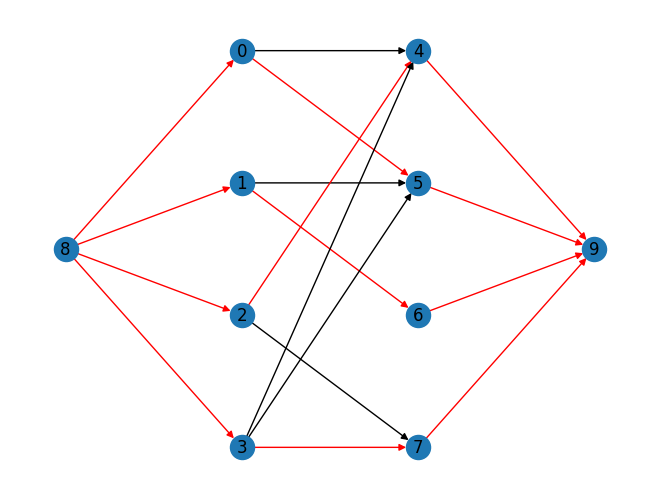

In [6]:
for u,v in G.edges():
    G[u][v]['color'] = 'black'

for el,el2 in tempTuple:
  G[el][el2]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]
pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1], 8:[-1,0.5], 9:[2,0.5]}
nx.draw(G, pos, with_labels = True, edge_color = colors)

#We should modify this function in order to highlight the link with flow

In [7]:
G[8][0]['capacity'] = 4
G[8][1]['capacity'] = 4
G[8][2]['capacity'] = 4
G[8][3]['capacity'] = 4
G[4][9]['capacity'] = 2 #there are at most 2 copies of b1
G[5][9]['capacity'] = 3
G[6][9]['capacity'] = 2
G[7][9]['capacity'] = 2
G[0][4]['capacity'] = 1
G[0][5]['capacity'] = 1
G[1][5]['capacity'] = 1
G[1][6]['capacity'] = 1
G[2][4]['capacity'] = 1
G[2][7]['capacity'] = 1
G[3][4]['capacity'] = 1
G[3][5]['capacity'] = 1
G[3][7]['capacity'] = 1

In [8]:
tmp = nx.algorithms.flow.maximum_flow(G,8,9)
flowSOL = tmp[1]
throughput = tmp[0]
tempTuple = []
for key in flowSOL:
  for el in flowSOL[key]:
    if(flowSOL[key][el] != 0):
      tempTuple.append((key,el))

{(0, 5): Text(0.5, 1.5, '1'),
 (4, 9): Text(1.5, 1.25, '2'),
 (5, 9): Text(1.5, 0.75, '3'),
 (1, 5): Text(0.5, 1.0, '1'),
 (1, 6): Text(0.5, 0.5, '1'),
 (6, 9): Text(1.5, 0.25, '1'),
 (2, 4): Text(0.5, 1.0, '1'),
 (2, 7): Text(0.5, -0.5, '1'),
 (7, 9): Text(1.5, -0.25, '2'),
 (3, 4): Text(0.5, 0.5, '1'),
 (3, 5): Text(0.5, 0.0, '1'),
 (3, 7): Text(0.5, -1.0, '1'),
 (8, 0): Text(-0.5, 1.25, '1'),
 (8, 1): Text(-0.5, 0.75, '2'),
 (8, 2): Text(-0.5, 0.25, '2'),
 (8, 3): Text(-0.5, -0.25, '3')}

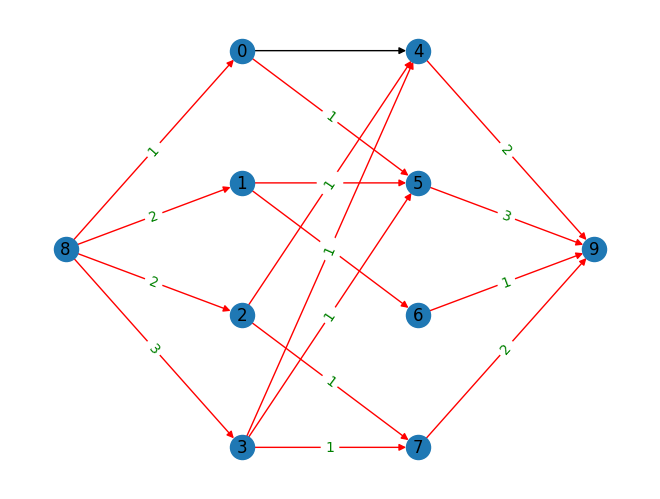

In [9]:
for u,v in G.edges():
    G[u][v]['color'] = 'black'

for el,el2 in tempTuple:
  G[el][el2]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]
pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1], 8:[-1,0.5], 9:[2,0.5]}
nx.draw(G, pos, with_labels = True, edge_color = colors)
dicto = {(u,v):str(flowSOL[u][v]) for u,v in tempTuple if flowSOL[u][v] > 0}
nx.draw_networkx_edge_labels(G,pos,edge_labels=dicto,font_color='green')

In [10]:
S = {8,0,1,2,3,4,6,7}
T = {9}
nx.cut_size(G,S,T)

#useless cell

3

In [11]:
print(f"The actual throughtput is {throughput}")
print("We have the possibility to sold and bought a book in order to maximize the number of assigned books(and the throughtput)")
print("Notice that the maximum flow that can arrive to node 6 is 1 and we have two out-flow, so it would be better to assign this extra flow to edge between 4 and destination")
print("Because the in-flow of 4 is three and the out-flow can be at most two")

The actual throughtput is 8
We have the possibility to sold and bought a book in order to maximize the number of assigned books(and the throughtput)
Notice that the maximum flow that can arrive to node 6 is 1 and we have two out-flow, so it would be better to assign this extra flow to edge between 4 and destination
Because the in-flow of 4 is three and the out-flow can be at most two


{(0, 4): Text(0.5, 2.0, '1'),
 (0, 5): Text(0.5, 1.5, '1'),
 (4, 9): Text(1.5, 1.25, '3'),
 (5, 9): Text(1.5, 0.75, '3'),
 (1, 5): Text(0.5, 1.0, '1'),
 (1, 6): Text(0.5, 0.5, '1'),
 (6, 9): Text(1.5, 0.25, '1'),
 (2, 4): Text(0.5, 1.0, '1'),
 (2, 7): Text(0.5, -0.5, '1'),
 (7, 9): Text(1.5, -0.25, '2'),
 (3, 4): Text(0.5, 0.5, '1'),
 (3, 5): Text(0.5, 0.0, '1'),
 (3, 7): Text(0.5, -1.0, '1'),
 (8, 0): Text(-0.5, 1.25, '2'),
 (8, 1): Text(-0.5, 0.75, '2'),
 (8, 2): Text(-0.5, 0.25, '2'),
 (8, 3): Text(-0.5, -0.25, '3')}

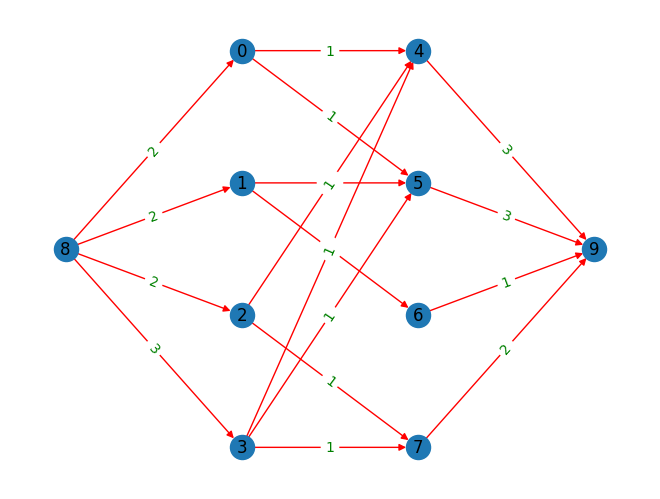

In [12]:
G[8][0]['capacity'] = 4
G[8][1]['capacity'] = 4
G[8][2]['capacity'] = 4
G[8][3]['capacity'] = 4
G[4][9]['capacity'] = 3 #there are at most 2 copies of b1
G[5][9]['capacity'] = 3
G[6][9]['capacity'] = 1
G[7][9]['capacity'] = 2

G[0][4]['capacity'] = 1
G[0][5]['capacity'] = 1
G[1][5]['capacity'] = 1
G[1][6]['capacity'] = 1
G[2][4]['capacity'] = 1
G[2][7]['capacity'] = 1
G[3][4]['capacity'] = 1
G[3][5]['capacity'] = 1
G[3][7]['capacity'] = 1

tmp = nx.algorithms.flow.maximum_flow(G,8,9)
flowSOL = tmp[1]
throughput = tmp[0]

tempTuple = []
for key in flowSOL:
  for el in flowSOL[key]:
    if(flowSOL[key][el] != 0):
      tempTuple.append((key,el))
for u,v in G.edges():
    G[u][v]['color'] = 'black'

for el,el2 in tempTuple:
  G[el][el2]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]
pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[1,2], 5:[1,1], 6:[1,0], 7:[1,-1], 8:[-1,0.5], 9:[2,0.5]}
nx.draw(G, pos, with_labels = True, edge_color = colors)
dicto = {(u,v):str(flowSOL[u][v]) for u,v in tempTuple if flowSOL[u][v] > 0}
nx.draw_networkx_edge_labels(G,pos,edge_labels=dicto,font_color='green')

In [13]:
print(f"As you can notice the throughput is {throughput} now")

As you can notice the throughput is 9 now
